# The information about the passengers of Titanic

The dataset was obtained in the course Data Science at Udacity. The used code is presented in the report. The most remarkable information about the passengers are presented in the following graphs

In [1]:
import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

titanic_data = pd.read_csv('titanic_data.csv')

In the dataset there is information about the passengers like name, sex, age, ticket and cabin number. It is marked with which class the passenger was travelling with the following key (Pclass): 1st = Upper, 2nd = Middle and 3rd = Lower. The Port of Embarkation and the paid fare is also in the table.

In [2]:
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
amount_of_passengers=len(titanic_data)
print (f"The total amount of passengers on board was: {amount_of_passengers}")

The total amount of passengers on board was: 891


Let me present some graphs.

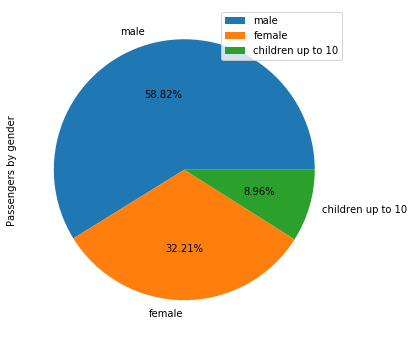

In [4]:
if titanic_data['Sex'][0]=='male' or titanic_data['Sex'][0]=='female':
    titanic_data["Sex"]= titanic_data["Sex"].replace(('male','female'),(0,1))
    
male=titanic_data.loc[(titanic_data["Age"]>10)&(titanic_data["Sex"]==0)].shape[0]
female=titanic_data.loc[(titanic_data["Age"]>10)&(titanic_data["Sex"]==1)].shape[0]
child=titanic_data.loc[(titanic_data["Age"]<=10)].shape[0]
dataframe_sex = pd.DataFrame({'Passengers by gender':[male,female,child]}, index=['male', 'female', 'children up to 10'])

dataframe_sex.plot(kind='pie', y=0, figsize=(6, 6),autopct='%0.2f%%')

The vast majority of the passengers of titanic were male.

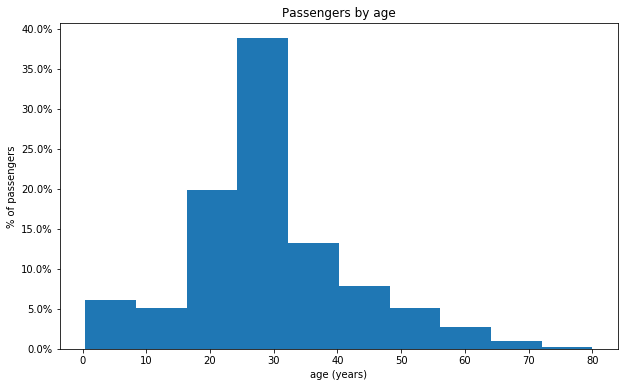

In [5]:
#To handle the missing values for the passengers Age, we fill the missing data with the mean value.
age_without_nan=titanic_data['Age'].fillna(titanic_data['Age'].mean())
age_without_nan.plot(kind='hist', figsize=(10, 6), weights=np.ones(len(titanic_data)) / len(titanic_data))
plt.ylabel('% of passengers')
plt.title('Passengers by age')
plt.xlabel('age (years)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

Among the passengers the around 3o years old were the biggest group.

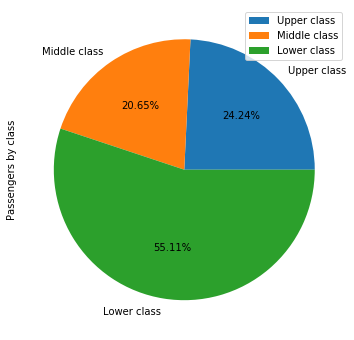

In [6]:
upper_amount=titanic_data.loc[titanic_data["Pclass"]==1].shape[0]
middle_amount=titanic_data.loc[titanic_data["Pclass"]==2].shape[0]
lower_amount=titanic_data.loc[titanic_data["Pclass"]==3].shape[0]
dataframe_class = pd.DataFrame({'Passengers by class':[upper_amount,middle_amount,lower_amount]}, index=['Upper class', 'Middle class', 'Lower class'])

dataframe_class.plot(kind='pie', y=0, figsize=(6, 6),autopct='%0.2f%%')


Most passengers were travelling with the lowest class.

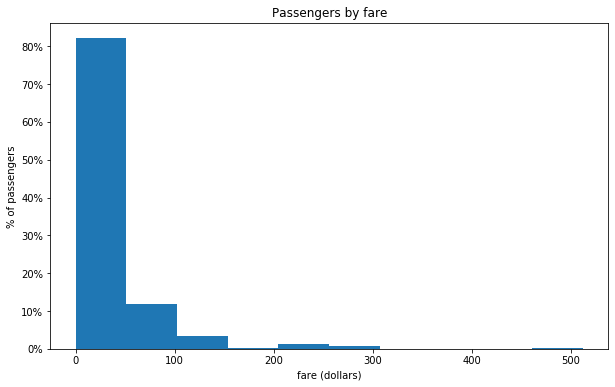

In [7]:
fare=titanic_data['Fare']
fare.plot(kind='hist', figsize=(10, 6), weights=np.ones(len(titanic_data)) / len(titanic_data))
plt.ylabel('% of passengers')
plt.title('Passengers by fare')
plt.xlabel('fare (dollars)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

To present more accurately what are the numbers in the high fare area below a plot with the logarithmic scale is presented.

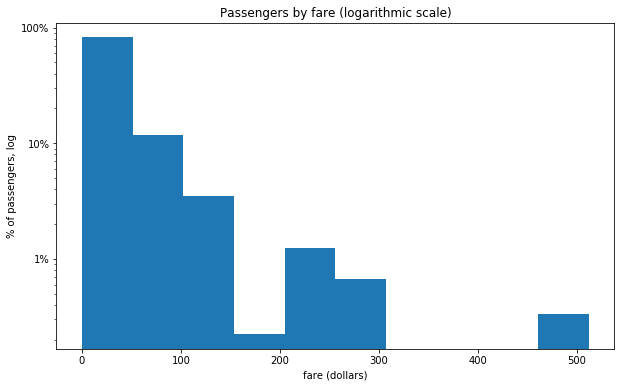

In [8]:
fare=titanic_data['Fare']
fare.plot(kind='hist', figsize=(10, 6), weights=np.ones(len(titanic_data)) / len(titanic_data), logy=True)
plt.ylabel('% of passengers, log')
plt.title('Passengers by fare (logarithmic scale)')
plt.xlabel('fare (dollars)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

Intuitively one would say that there was a correlation between the fare and the class with which a passenger was travelling. However fare turns out to be a really complicated variable. It's based on the price of the ticket sold to a traveling group (often a family). It's not the cost of the ticket for each individual (unless the Fare was for 1 person).

Furthermore there are a handful of 1st class passengers who had a Fare of 0. Joseph Ismay's name stands out. He was the chairman of the company that owned the Titanic. So that's why he got a free ride. William Harrison was his private secretary, and also got a free ride. So these 0 Fares are likely not data errors but simply people who legitimately got a free ticket on the Titanic.
That is why the result for fare are not to be considered.
The main aim of the analysis is to see whether there is an age, gender or class correlation between the survival rates of the passengers.

# The results of the analysis

In the following chapter the main results of the analysis are shown.

In [9]:
survived=len(titanic_data.loc[titanic_data["Survived"]==1])
survival_rate=survived/amount_of_passengers*100
print (f"The total amount of passengers that survived the crush is: {survived}. The overall survival rate is: {survival_rate:.1f}%.")

The total amount of passengers that survived the crush is: 342. The overall survival rate is: 38.4%.


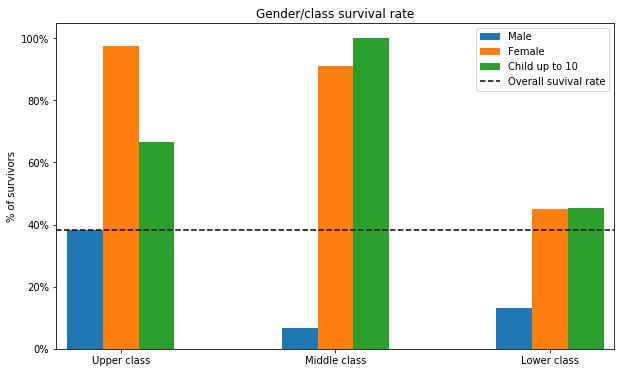

In [10]:
male_first=titanic_data.loc[(titanic_data['Pclass']==1)&(titanic_data["Age"]>10)&(titanic_data["Sex"]==0)].shape[0]
male_rate_first=titanic_data.loc[(titanic_data['Pclass']==1)&(titanic_data["Age"]>10)&(titanic_data["Sex"]==0)&(titanic_data["Survived"]==1)].shape[0]/male_first

female_first=titanic_data.loc[(titanic_data['Pclass']==1)&(titanic_data["Age"]>10)&(titanic_data["Sex"]==1)].shape[0]
female_rate_first=titanic_data.loc[(titanic_data['Pclass']==1)&(titanic_data["Age"]>10)&(titanic_data["Sex"]==1)&(titanic_data["Survived"]==1)].shape[0]/female_first

child_first=titanic_data.loc[(titanic_data['Pclass']==1)&(titanic_data["Age"]<10)].shape[0]
child_rate_first=titanic_data.loc[(titanic_data['Pclass']==1)&(titanic_data["Age"]<10)&(titanic_data["Survived"]==1)].shape[0]/child_first

male_second=titanic_data.loc[(titanic_data['Pclass']==2)&(titanic_data["Age"]>10)&(titanic_data["Sex"]==0)].shape[0]
male_rate_second=titanic_data.loc[(titanic_data['Pclass']==2)&(titanic_data["Age"]>10)&(titanic_data["Sex"]==0)&(titanic_data["Survived"]==1)].shape[0]/male_second

female_second=titanic_data.loc[(titanic_data['Pclass']==2)&(titanic_data["Age"]>10)&(titanic_data["Sex"]==1)].shape[0]
female_rate_second=titanic_data.loc[(titanic_data['Pclass']==2)&(titanic_data["Age"]>10)&(titanic_data["Sex"]==1)&(titanic_data["Survived"]==1)].shape[0]/female_second

child_second=titanic_data.loc[(titanic_data['Pclass']==2)&(titanic_data["Age"]<10)].shape[0]
child_rate_second=titanic_data.loc[(titanic_data['Pclass']==2)&(titanic_data["Age"]<10)&(titanic_data["Survived"]==1)].shape[0]/child_second

male_third=titanic_data.loc[(titanic_data['Pclass']==3)&(titanic_data["Age"]>10)&(titanic_data["Sex"]==0)].shape[0]
male_rate_third=titanic_data.loc[(titanic_data['Pclass']==3)&(titanic_data["Age"]>10)&(titanic_data["Sex"]==0)&(titanic_data["Survived"]==1)].shape[0]/male_third

female_third=titanic_data.loc[(titanic_data['Pclass']==3)&(titanic_data["Age"]>10)&(titanic_data["Sex"]==1)].shape[0]
female_rate_third=titanic_data.loc[(titanic_data['Pclass']==3)&(titanic_data["Age"]>10)&(titanic_data["Sex"]==1)&(titanic_data["Survived"]==1)].shape[0]/female_third

child_third=titanic_data.loc[(titanic_data['Pclass']==3)&(titanic_data["Age"]<10)].shape[0]
child_rate_third=titanic_data.loc[(titanic_data['Pclass']==3)&(titanic_data["Age"]<10)&(titanic_data["Survived"]==1)].shape[0]/child_third

dataframe_class_sex_survival = pd.DataFrame({'Male':[male_rate_first,male_rate_second, male_rate_third],'Female':[female_rate_first,female_rate_second, female_rate_third], 'Child up to 10':[child_rate_first, child_rate_second, child_rate_third]},index=['Upper class','Middle class','Lower class'] )
df_overall_rate=[survival_rate/100]*dataframe_class_sex_survival.shape[0]
dataframe_survival_rate = pd.DataFrame({'Overall suvival rate': df_overall_rate}, index=[-0.3, 0, 2.3])

ax=dataframe_class_sex_survival.plot.bar(figsize=(10, 6), rot=0)
dataframe_survival_rate.plot(style='k--', ax=ax, xlim=(-.3,2.3))
plt.title('Gender/class survival rate')
plt.ylabel('% of survivors')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

In general female survival rate was higher than the male one. Most men survived in the 1st class, less in the middle class. Most survival rate for children was in the 2nd class.

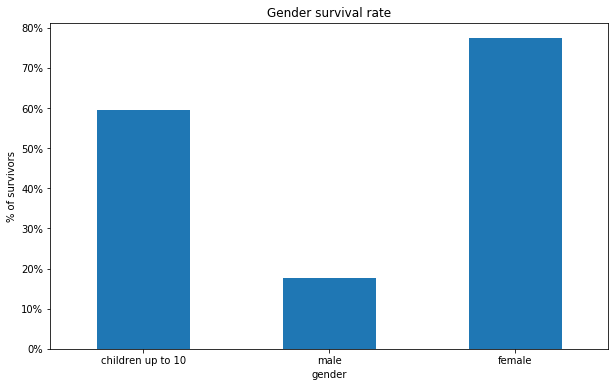

In [11]:
male_rate=titanic_data.loc[(titanic_data["Age"]>10)&(titanic_data["Sex"]==0)&(titanic_data["Survived"]==1)].shape[0]/male
female_rate=titanic_data.loc[(titanic_data["Age"]>10)&(titanic_data["Sex"]==1)&(titanic_data["Survived"]==1)].shape[0]/female
child_rate=titanic_data.loc[(titanic_data["Age"]<=10)&(titanic_data["Survived"]==1)].shape[0]/child

dataframe_sex_survival = pd.DataFrame({'Gender survival rate':[child_rate,male_rate,female_rate]}, index=['children up to 10','male', 'female'])

ax=dataframe_sex_survival.plot.bar(figsize=(10, 6),rot=0, legend=False)

plt.title('Gender survival rate')
plt.xlabel('gender')
plt.ylabel('% of survivors')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

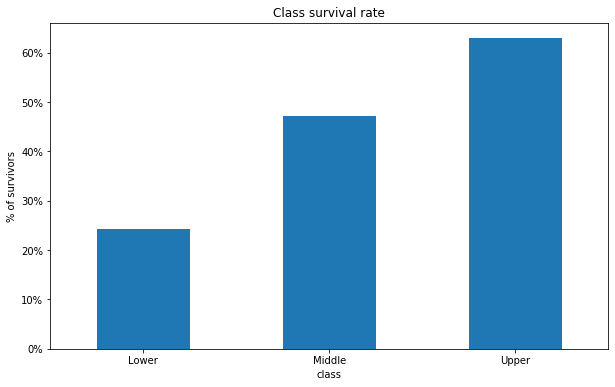

In [12]:
upper_rate=titanic_data.loc[(titanic_data['Pclass']==1)&(titanic_data["Survived"]==1)].shape[0]/upper_amount
middle_rate=titanic_data.loc[(titanic_data['Pclass']==2)&(titanic_data["Survived"]==1)].shape[0]/middle_amount
lower_rate=titanic_data.loc[(titanic_data['Pclass']==3)&(titanic_data["Survived"]==1)].shape[0]/lower_amount

dataframe_class_survival = pd.DataFrame({'Class survival rate':[lower_rate,middle_rate,upper_rate]}, index=['Lower', 'Middle', 'Upper'])

ax=dataframe_class_survival.plot.bar(figsize=(10, 6),rot=0, legend=False)

plt.title('Class survival rate')
plt.xlabel('class')
plt.ylabel('% of survivors')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

Text(0, 0.5, 'number of passengers')

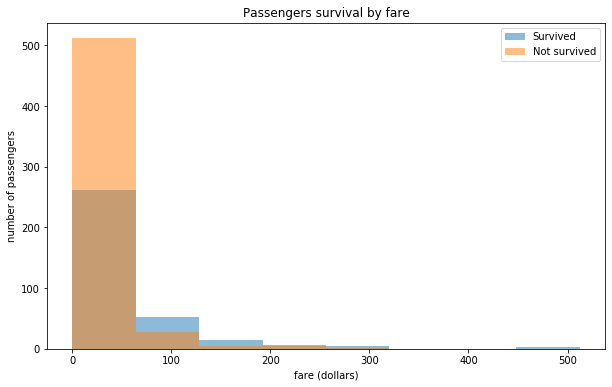

In [13]:
fare_survived = titanic_data.loc[titanic_data["Survived"]==1]['Fare']
fare_not_survived = titanic_data.loc[titanic_data["Survived"]==0]['Fare']

dataframe_fare_survival = pd.DataFrame({'Survived':fare_survived, 'Not survived':fare_not_survived})

dataframe_fare_survival.plot.hist(figsize=(10, 6),bins=8, alpha=0.5)

plt.title('Passengers survival by fare')
plt.xlabel('fare (dollars)')
plt.ylabel('number of passengers')

Text(0.5, 0, 'fare (dollars)')

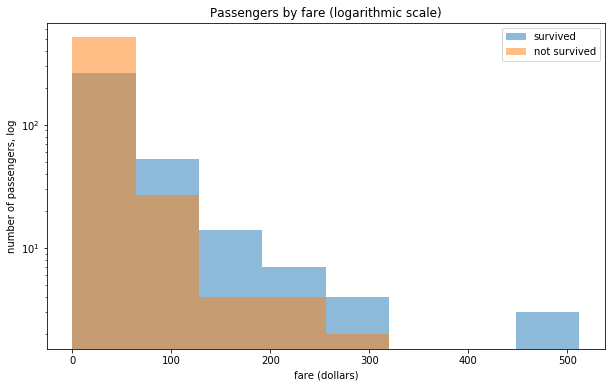

In [14]:
fare_survived = titanic_data.loc[titanic_data["Survived"]==1]['Fare']
fare_not_survived = titanic_data.loc[titanic_data["Survived"]==0]['Fare']

dataframe_fare_survival = pd.DataFrame({'survived':fare_survived, 'not survived':fare_not_survived})

dataframe_fare_survival.plot.hist(figsize=(10, 6),bins=8, alpha=0.5, logy=True)
plt.ylabel('number of passengers, log')
plt.title('Passengers by fare (logarithmic scale)')
plt.xlabel('fare (dollars)')